In [1]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import seaborn as sns
from simulation.single_codon import single_codon
from matplotlib import rcParams
%matplotlib inline

In [2]:
# read in sim runs and concatenate
df_master = pd.read_csv(f"../output/sim/single_gene_single_codon_{1}.tsv", sep="\t")
df_master["seed"] = "1"
for i in range(2, 4):
    tmp = pd.read_csv(f"../output/sim/single_gene_single_codon_{i}.tsv", sep="\t")
    tmp["seed"] = f"{i}"
    df_master = df_master.append(tmp, ignore_index=True)
display(df_master)

,time,species,protein,transcript,ribo_density,seed
0,0.000000,CAT_charged,10.0,0.0,0.000000,1
1,0.000000,CAT_uncharged,0.0,0.0,0.000000,1
2,0.000000,TTT_charged,200.0,0.0,0.000000,1
3,0.000000,TTT_uncharged,0.0,0.0,0.000000,1
4,0.000000,__proteinX_rbs,0.0,0.0,0.000000,1
...,...,...,...,...,...,...
6499,1199.999065,__proteinX_rbs,1883.0,0.0,0.000000,3
6500,1199.999065,__ribosome,4.0,0.0,0.000000,3
6501,1199.999065,phi1,2.0,0.0,0.000000,3
6502,1199.999065,proteinX,21622.0,1893.0,0.103539,3


In [3]:
df_filtered = df_master[(df_master.species == "TTT_charged") | (df_master.species == "TTT_uncharged")]
df_filtered

,time,species,protein,transcript,ribo_density,seed
2,0.000000,TTT_charged,200.0,0.0,0.0,1
3,0.000000,TTT_uncharged,0.0,0.0,0.0,1
10,4.999525,TTT_charged,155.0,0.0,0.0,1
11,4.999525,TTT_uncharged,45.0,0.0,0.0,1
19,10.001277,TTT_charged,155.0,0.0,0.0,1
...,...,...,...,...,...,...
6480,1189.999098,TTT_uncharged,198.0,0.0,0.0,3
6488,1194.999719,TTT_charged,3.0,0.0,0.0,3
6489,1194.999719,TTT_uncharged,197.0,0.0,0.0,3
6497,1199.999065,TTT_charged,2.0,0.0,0.0,3


<AxesSubplot:xlabel='time', ylabel='protein'>

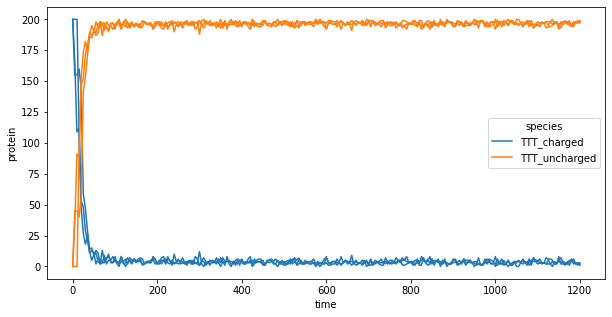

In [4]:
rcParams['figure.figsize'] = [10, 5]
sns.lineplot(x="time", y="protein", units="seed", hue="species", estimator=None, data=df_filtered)

In [ ]:
for i in range(1,4):
    single_codon(i, 1e2, 1200, "/home/alexis/projects/tRNA-dynamics/output/sim")